<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# insert code here
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [21]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [5]:
# insert code here
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Check some data

In [7]:
# Step 1: Check the shape of the data
print("Training data shape:", train_images.shape)  # (num_samples, height, width, channels)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [10]:
# Step 2: Check the unique classes in the dataset
unique_classes = np.unique(train_labels)
print("Unique classes in training labels:", unique_classes)


Unique classes in training labels: [0 1 2 3 4 5 6 7 8 9]


In [12]:
%matplotlib inline

In [14]:
# Step 3: Visualize some sample images
def plot_samples(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

In [16]:
# CIFAR-10 class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat',
    'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

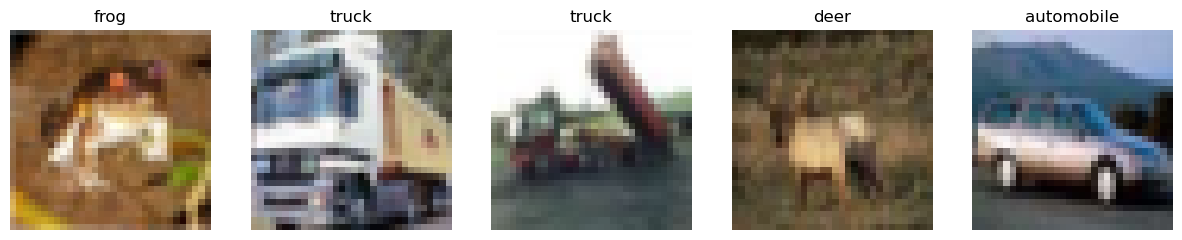

In [18]:
# Display some sample images from the training set
plot_samples(train_images, train_labels, class_names)

## Prepare data

In [20]:
# insert code here
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [22]:
# insert code here
# Create the model
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

C:\Users\gillb\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [27]:
# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

In [29]:
# Flattening and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

In [31]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
# insert code here
# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [37]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\gillb\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

## Fit the training data

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [42]:
from tensorflow.keras.callbacks import TensorBoard

In [44]:
# Set up TensorBoard callback
tensorboard = TensorBoard(log_dir='logs', histogram_freq=1)

In [46]:
# Fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,  # You can adjust the number of epochs
                    batch_size=64,  # You can adjust the batch size
                    callbacks=[tensorboard])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.2648 - loss: 1.9540 - val_accuracy: 0.4592 - val_loss: 1.4704
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.4752 - loss: 1.4331 - val_accuracy: 0.5241 - val_loss: 1.2762
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.5517 - loss: 1.2569 - val_accuracy: 0.5852 - val_loss: 1.1514
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.5800 - loss: 1.1770 - val_accuracy: 0.6211 - val_loss: 1.0544
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.6130 - loss: 1.0926 - val_accuracy: 0.6622 - val_loss: 0.9647
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.6360 - loss: 1.0317 - val_accuracy: 0.6941 - val_loss: 0.8947
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6497 - loss: 0.9848 - val_accuracy: 0.7010 - val_loss: 0.8635
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6634 - loss: 0.9574 - 

In [48]:
# Make predictions
predictions = np.argmax(model.predict(test_images), axis=-1)
# Display predictions
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[3 8 8 ... 5 0 7]


In [52]:
# Evaluate the model on the test set
core = model.evaluate(test_images, test_labels, batch_size=10)

# Print test loss and accuracy
print('\nTest loss: %.6f, Test accuracy: %.6f' % (core[0], core[1]))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7486 - loss: 0.7271

Test loss: 0.732000, Test accuracy: 0.750400


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [54]:
from tensorflow.keras.callbacks import TensorBoard

In [56]:
# Set up TensorBoard
tensorboard = TensorBoard(log_dir='logs/cifar10', histogram_freq=1)

In [58]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=64,
                    callbacks=[tensorboard])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.7374 - loss: 0.7410 - val_accuracy: 0.7534 - val_loss: 0.7114
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7370 - loss: 0.7433 - val_accuracy: 0.7516 - val_loss: 0.7016
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7425 - loss: 0.7329 - val_accuracy: 0.7523 - val_loss: 0.7110
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7457 - loss: 0.7284 - val_accuracy: 0.7547 - val_loss: 0.7108
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7442 - loss: 0.7261 - val_accuracy: 0.7370 - val_loss: 0.7567
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7452 - loss: 0.7190 - val_accuracy: 0.7533 - val_loss: 0.7227
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7499 - loss: 0.7058 - val_accuracy: 0.7635 - val_loss: 0.6975
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.7533 - loss: 0.6981 - 

## Create predictions

In [62]:
# Generate predictions on the test set
predictions = model.predict(test_images)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [64]:
# Print the first 10 predictions and corresponding true labels
for i in range(10):
    print(f'True label: {test_labels[i][0]}, Predicted label: {predicted_classes[i]}')

True label: 0.0, Predicted label: 3
True label: 0.0, Predicted label: 8
True label: 0.0, Predicted label: 8
True label: 1.0, Predicted label: 0
True label: 0.0, Predicted label: 6
True label: 0.0, Predicted label: 6
True label: 0.0, Predicted label: 1
True label: 0.0, Predicted label: 6
True label: 0.0, Predicted label: 3
True label: 0.0, Predicted label: 1


In [70]:
print("Shape of predicted_classes:", predicted_classes.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of predicted_classes: (10000,)
Shape of test_labels: (10000, 10)


In [72]:
# Convert one-hot encoded labels to class indices
test_labels_indices = np.argmax(test_labels, axis=1)  # Shape will be (10000,)

In [74]:
# Calculate the accuracy
accuracy = np.mean(predicted_classes == test_labels_indices)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 76.28%


## Evaluate the model

In [76]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=10)

# Print the results
print(f'Test loss: {test_loss:.6f}, Test accuracy: {test_accuracy:.6f}')

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7641 - loss: 0.6851
Test loss: 0.687699, Test accuracy: 0.762800


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [84]:
test_labels_indices = np.argmax(test_labels, axis=1)
print(classification_report(test_labels_indices, predicted_classes))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1000
           1       0.90      0.88      0.89      1000
           2       0.78      0.55      0.64      1000
           3       0.59      0.62      0.61      1000
           4       0.64      0.80      0.71      1000
           5       0.73      0.61      0.66      1000
           6       0.73      0.89      0.80      1000
           7       0.80      0.81      0.81      1000
           8       0.82      0.88      0.85      1000
           9       0.83      0.87      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [86]:
cm = confusion_matrix(test_labels_indices, predicted_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[725  13  37  19  29   1  14  12 101  49]
 [  6 875   2   7   3   3  14   3  25  62]
 [ 44   3 545  75 142  46  94  31  14   6]
 [ 10   9  35 620  71 109  84  37  12  13]
 [ 10   2  19  43 802  20  49  44  10   1]
 [  6   2  23 181  79 610  39  49   3   8]
 [  4   2  13  33  41   9 888   5   2   3]
 [  5   1  15  42  64  39  13 808   2  11]
 [ 29  21   3  15   7   1   7   6 883  28]
 [ 10  47   4  11   6   3   8  12  27 872]]


## Visualisation of cost

In [88]:
# Retrieve loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)


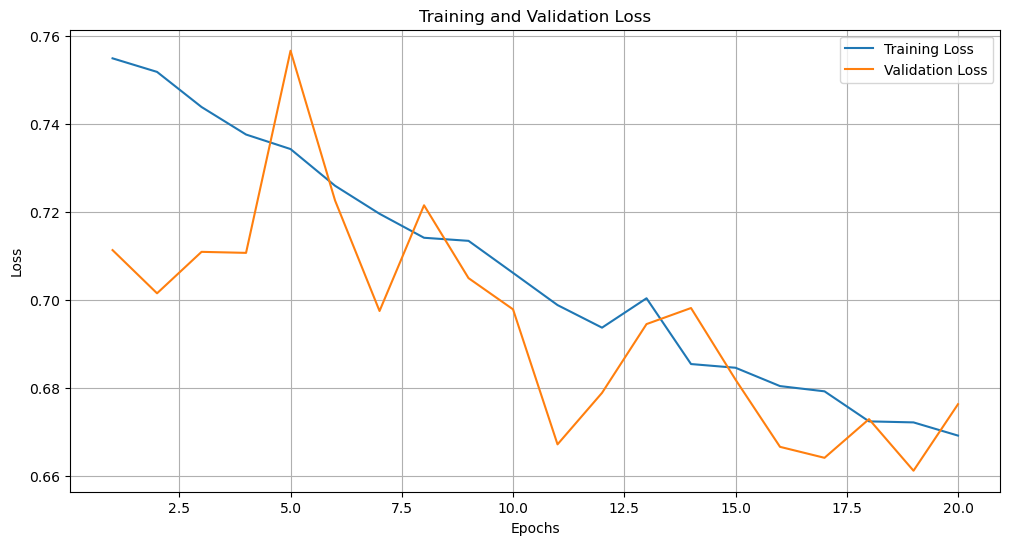

In [90]:
# Plotting the loss values
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Results

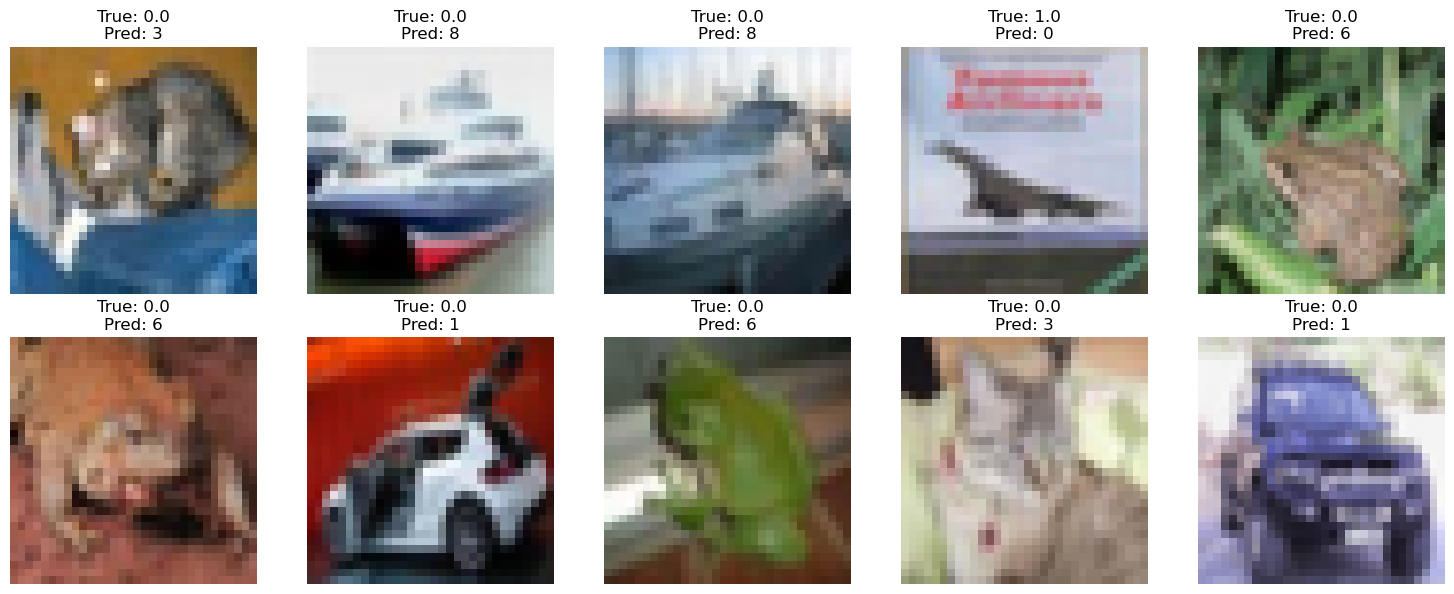

In [100]:
def plot_predicted_vs_actual(images, true_labels, predicted_labels, num=10):
    plt.figure(figsize=(15, 6))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels[i][0]}\nPred: {predicted_labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to plot the first 10 predictions
plot_predicted_vs_actual(test_images, test_labels, predicted_classes, num=10)

In [102]:
# Generate predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


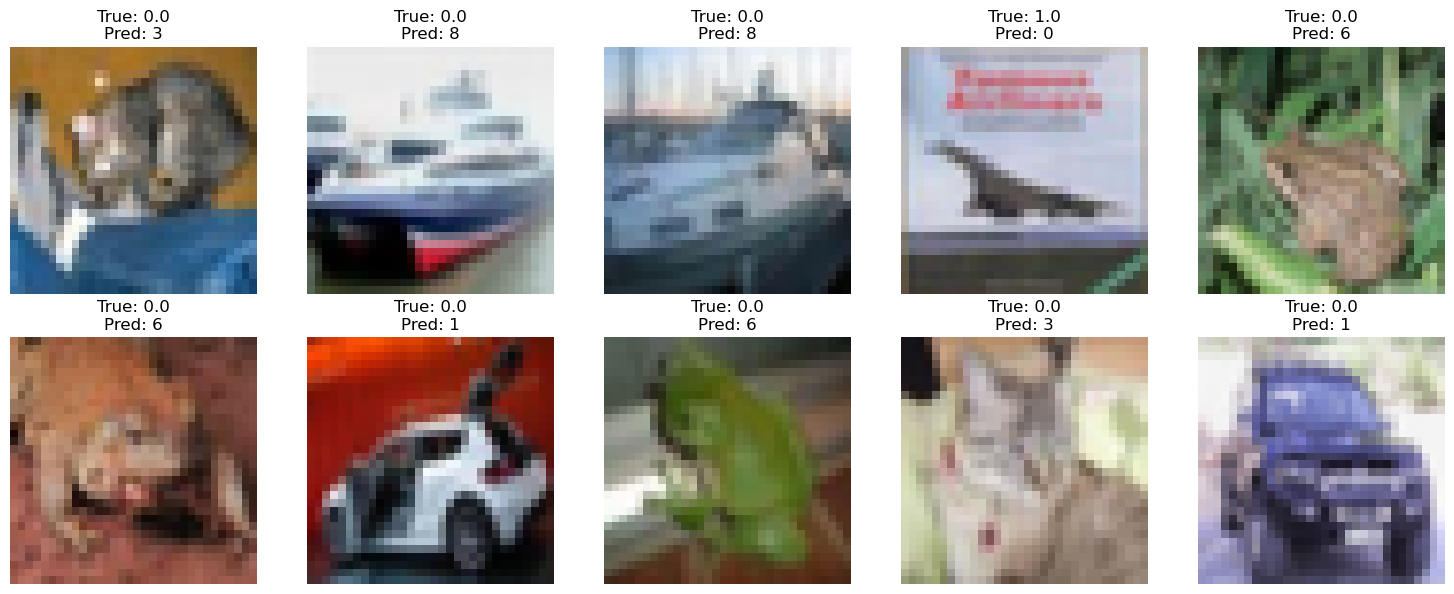

In [103]:
# Convert one-hot encoded labels to class indices
test_labels_indices = np.argmax(test_labels, axis=1)

# Visualize predicted vs actual
plot_predicted_vs_actual(test_images, test_labels, predicted_classes, num=10)

In [66]:
# insert code here
# Function to display a few images
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i][0]}')
        plt.axis('off')
    plt.show()



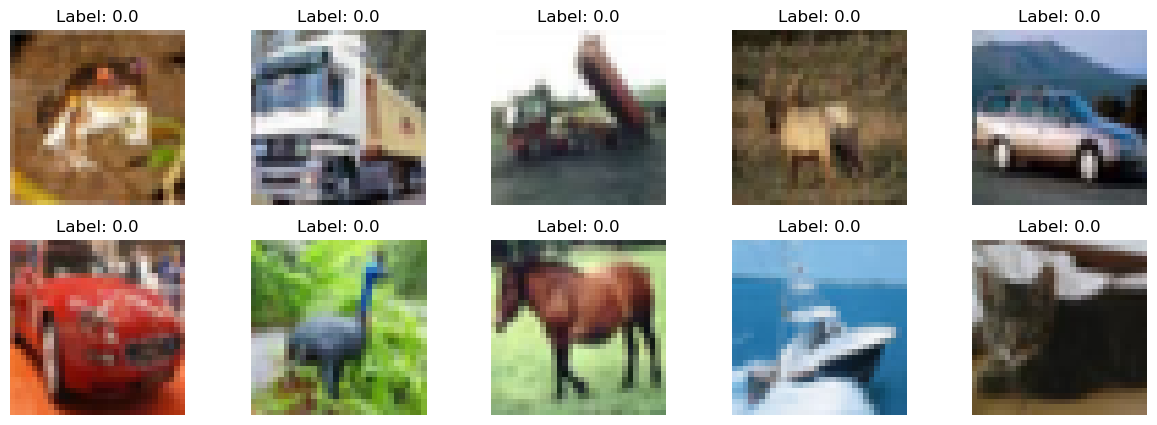

In [68]:
# Display the first 10 images from the training set
display_images(train_images, train_labels)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



